In [1]:
from stardist_model import *
from cross_validation_stardist import * 

In [2]:
CROSS_VALIDATION = True
VISUALISATION = True
VISUALISATION_RESULTS = True
PICTURES = True

In [3]:
if CROSS_VALIDATION:
    cross_validate("MIP", "", [125], [0.003,0.002], [40])
    cross_validate("MIP_FOCUS", "", [125], [0.003,0.002], [40])
    cross_validate("FINETUNE", "", [125], [0.003,0.002], [40])

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

base_model.py (149): output path for model already exists, files may be overwritten: /Users/abderramane/ml-project-2-segmentedsouls/models/mip


number of images:  18
- training:        15
- validation:       3
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.214598, nms_thresh=0.3.
If you want to compute separable approximations, please install it with
pip install scikit-tensor-py3
Epoch 1/10
Cause: Unable to locate the source code of <function _gcd_import at 0x1047bc310>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function _gcd_import at 0x1047bc310>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function _gcd_import at 0x1047bc310>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - ETA: 0s - loss: 2.3192 - prob_loss: 0.7947 - dist_loss: 7.6227 - prob_kld: 0.6392 - dist_relevant_mae: 7.6226 - dist_relevant_mse: 91.0816 - dist_dist_iou_metric: 0.0071    

KeyboardInterrupt: 

In [3]:
from visualisation_stardist import *

if VISUALISATION:
    visualisation("results_/", "MIP")
    visualisation("results_/", "MIPFOCUS")
    visualisation("results_/", "FINETUNED")

AttributeError: 'Figure' object has no attribute 'shape'

In [3]:
from visualisation_stardist import *

if VISUALISATION_RESULTS:
    visualisation("results/", "MIP")
    visualisation("results/", "MIPFOCUS")
    visualisation("results/", "FINETUNED")

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.451346, nms_thresh=0.3.
predicting instances with nms_thresh = 0.3
non-maximum suppression...
Non Maximum Suppression (2D) ++++ 
NMS: n_polys    = 24064 
NMS: n_rays     = 32  
NMS: thresh     = 0.300 
NMS: use_bbox   = 1
NMS: use_kdtree = 1
NMS: building kdtree...
NMS: starting suppression loop
|#############################################     | [91 % suppressed]
NMS: Suppressed polygons:      22052 / 24064  (91.64 %)
keeping 2012/24064 polyhedra
NMS took 0.1808 s
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.453419, nms_thresh=0.3.
predicting instances with nms_thresh = 0.3
non-maximum suppression...
Non Maximum Suppression (2D) ++++ 
NMS: n_polys    = 20817 
NMS: n_rays     = 32  
NMS: thresh     = 0.300 
NMS: use_bbox   = 1
NMS: use_kdtree = 1
keeping 1867/20817 polyhedra
NMS 

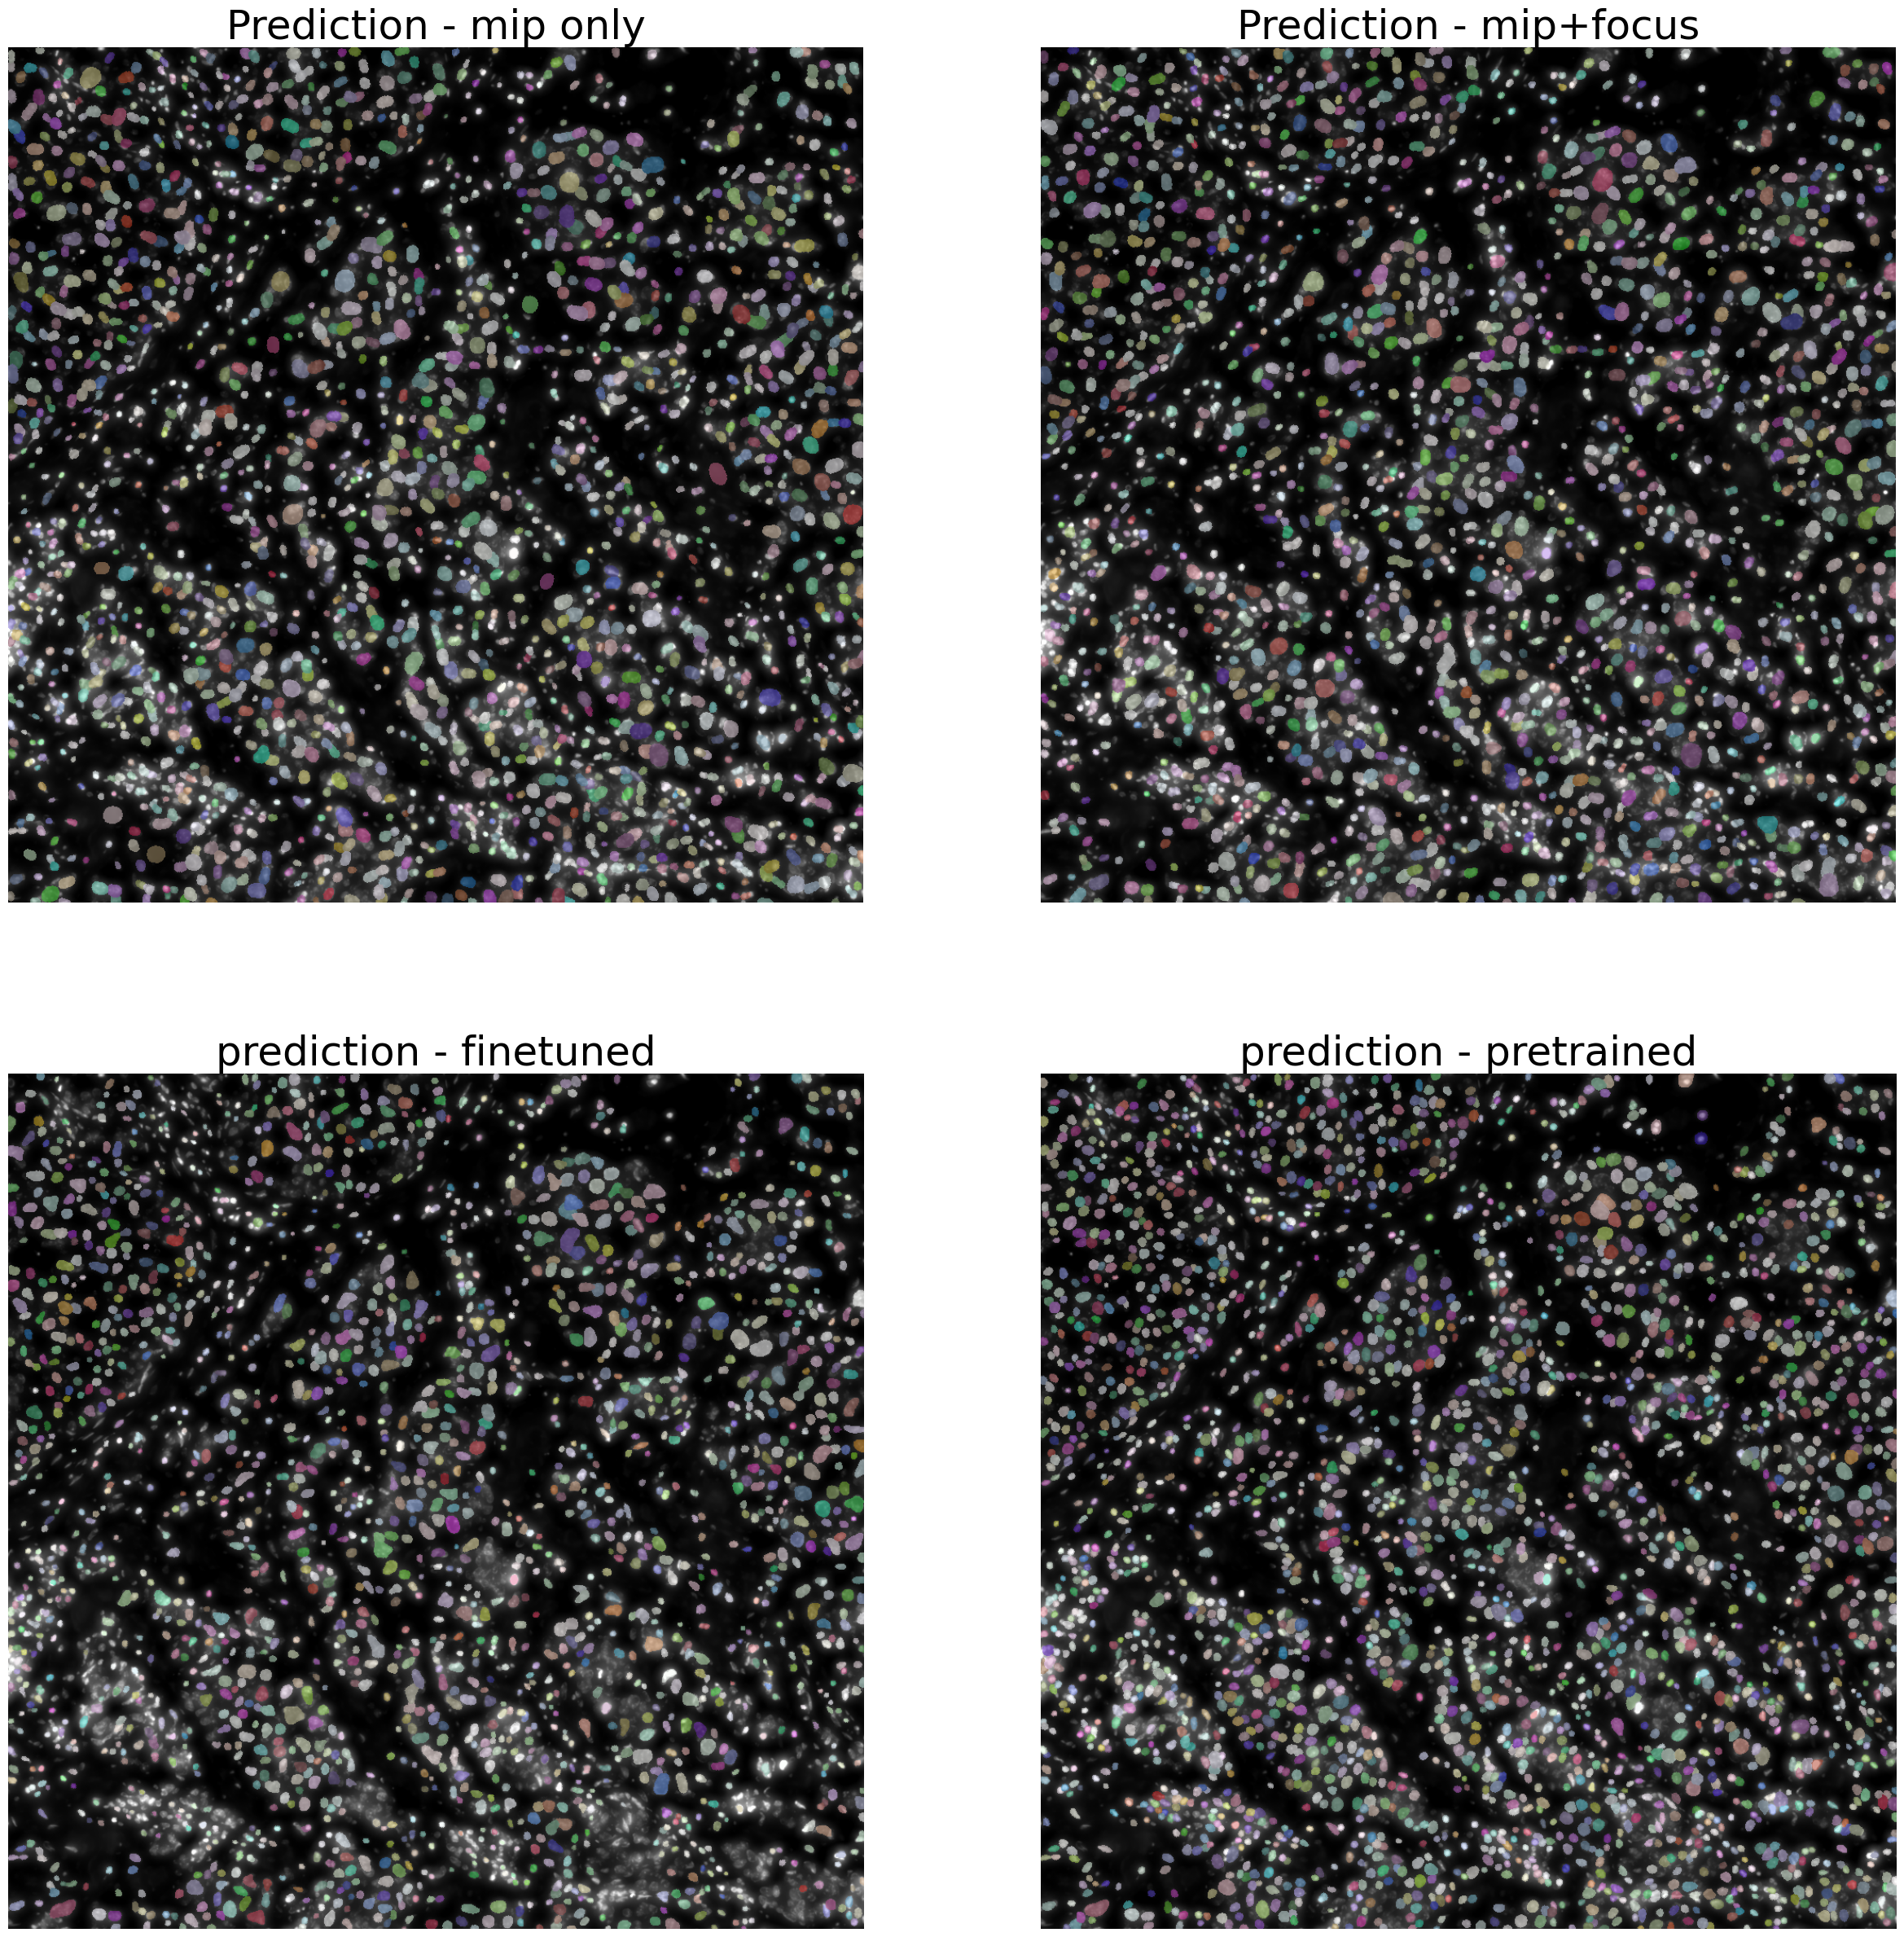

In [13]:
if PICTURES:
    import matplotlib.pyplot as plt

    from tifffile import imread
    from csbdeep.utils import normalize

    from stardist.models import StarDist2D
    
    X = ["data/mip-reduced.tif"]
    X = list(map(imread,X))

    axis_norm = (0,1)
    my_img_norm = normalize(X[0], 1,99.8, axis=axis_norm)
    my_img_norm =my_img_norm[1000:2000,1000:2000]
    axis_norm = (0,1)

    mip_model_predict = StarDist2D(None, name="mip", basedir="results/models")
    plt.rcParams.update({'font.size': 30})

    segmented_img, details_img = mip_model_predict.predict_instances(my_img_norm, verbose=True)
    plt.rcParams["figure.figsize"] = (30,30)

    plt.subplot(2,2,1)
    plt.imshow(render_label(normalize(segmented_img), img=my_img_norm))
    plt.axis("off")
    plt.title("Prediction - mip only")


    mipfocus_model_predict = StarDist2D(None, name="mipfocus", basedir="results/models")

    segmented_img_mipfocus, details_img1 = mipfocus_model_predict.predict_instances(my_img_norm, verbose=True)
    plt.rcParams["figure.figsize"] = (30,30)
    plt.subplot(2,2,2)
    plt.imshow(render_label(normalize(segmented_img_mipfocus), img=my_img_norm))
    plt.axis("off")
    plt.title("Prediction - mip+focus")


    finetuned_model_predict = StarDist2D(None, name="finetuned", basedir="results/models")

    segmented_img_finetuned, details_img2 = finetuned_model_predict.predict_instances(my_img_norm, verbose=True)
    plt.rcParams["figure.figsize"] = (30,30)


    plt.subplot(2,2,3)
    plt.imshow(render_label(normalize(segmented_img_finetuned), img=my_img_norm))
    plt.axis("off")
    plt.title("prediction - finetuned")


    StarDist2D.from_pretrained()
    model2 = StarDist2D.from_pretrained('2D_versatile_fluo')

    segmented_img_pre, details_img3 = model2.predict_instances(my_img_norm, verbose=True)
    plt.rcParams["figure.figsize"] = (30,30)

    plt.subplot(2,2,4)
    plt.imshow(render_label(normalize(segmented_img_pre), img=my_img_norm))
    plt.axis("off")
    plt.title("prediction - pretrained")

    print(len(details_img["points"]),len(details_img1["points"]),len(details_img2["points"]),len(details_img3["points"]))


In [5]:
StarDist2D.from_pretrained()


There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None


Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.476619, nms_thresh=0.3.
predicting instances with nms_thresh = 0.3
non-maximum suppression...
keeping 1692/30432 polyhedraNon Maximum Suppression (2D) ++++ 
NMS: n_polys    = 30432 
NMS: n_rays     = 32  
NMS: thresh     = 0.300 
NMS: use_bbox   = 1
NMS: use_kdtree = 1
NMS: building kdtree...
NMS: starting suppression loop
|####################################              | [72 % suppressed]
NMS took 0.2427 s
|##############################################    | [94 % suppressed]
NMS: Suppressed polygons:      28740 / 30432  (94.44 %)
1692


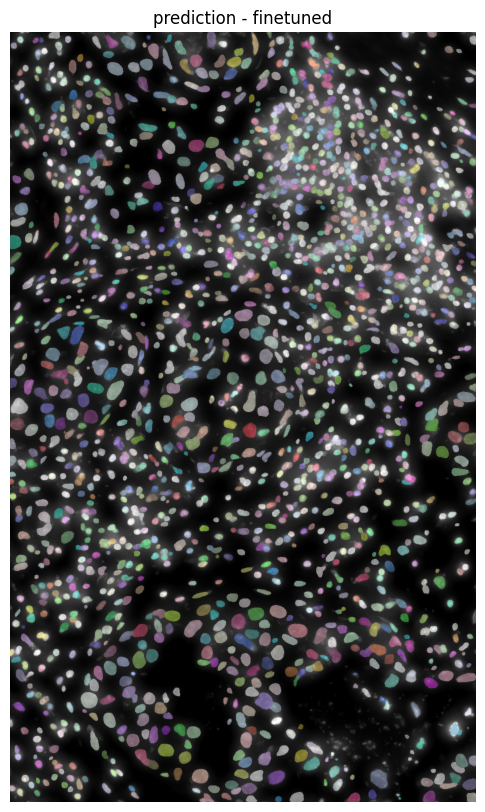

In [11]:
import matplotlib.pyplot as plt

from tifffile import imread
from csbdeep.utils import normalize

from stardist.models import StarDist2D

X = ["data/mip_2.tif"]
X = list(map(imread,X))

axis_norm = (0,1)
my_img_norm = normalize(X[0], 1,99.8, axis=axis_norm)
my_img_norm =my_img_norm
axis_norm = (0,1)


finetuned_model_predict = StarDist2D(None, name="finetuned", basedir="results/models")

segmented_img_finetuned, details_img2 = finetuned_model_predict.predict_instances(my_img_norm, verbose=True)
plt.rcParams["figure.figsize"] = (15,10)


plt.imshow(render_label(normalize(segmented_img_finetuned), img=my_img_norm))
plt.axis("off")
plt.title("prediction - finetuned")
print(len(details_img2["points"]))

In [3]:
import matplotlib.pyplot as plt

from tifffile import imread
from csbdeep.utils import normalize

from stardist.models import StarDist2D

X = ["data/mip_reduced+.tif"]
X = list(map(imread,X))

axis_norm = (0,1)
my_img_norm = normalize(X[0], 1,99.8, axis=axis_norm)
my_img_norm =my_img_norm
axis_norm = (0,1)

StarDist2D.from_pretrained()
model2 = StarDist2D.from_pretrained('2D_versatile_fluo')

segmented_img_pre, details_img3 = model2.predict_instances(my_img_norm, verbose=True)

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


: 

In [17]:
print(len(details_img3["points"]))

105691


In [18]:
X[0].shape

(6444, 8854)

In [1]:
import matplotlib.pyplot as plt

from tifffile import imread
from csbdeep.utils import normalize

from stardist.models import StarDist2D

X = ["data/mip_reduced+.tif"]
X = list(map(imread,X))

In [4]:
import numpy as np
from stardist.models import StarDist2D

def split_image_into_rectangles(image, num_rectangles_row, num_rectangles_col):
    rows, cols = image.shape[:2]
    row_height = rows // num_rectangles_row
    col_width = cols // num_rectangles_col
    rectangles = []

    for i in range(num_rectangles_row):
        for j in range(num_rectangles_col):
            rect = image[i*row_height:(i+1)*row_height, j*col_width:(j+1)*col_width]
            rectangles.append(rect)

    return rectangles

model2 = StarDist2D.from_pretrained('2D_versatile_fluo')

X = ["data/mip_reduced+.tif"]
X = list(map(imread,X))

my_img = X[0]  # replace with your actual image data
rectangles = split_image_into_rectangles(my_img, 16, 16)  

total_points = 0

for rect in rectangles:
    rect_norm = normalize(rect, 1, 99.8, axis=(0,1))  # define normalize as required

    _, details = model2.predict_instances(rect_norm)

    total_points += len(details["points"])

print(f"Total points: {total_points}")

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Total points: 140060


In [21]:
axis_norm = (0,1)
my_img_norm = normalize(X[0], 1,99.8, axis=axis_norm)
my_img_norm =my_img_norm[1000:2000,:]
axis_norm = (0,1)

StarDist2D.from_pretrained()
model2 = StarDist2D.from_pretrained('2D_versatile_fluo')

segmented_img_pre, details_img3 = model2.predict_instances(my_img_norm, verbose=True)
print(len(details_img3["points"]))

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
predicting instances with nms_thresh = 0.3
non-maximum suppression...
Non Maximum Suppression (2D) ++++ 
NMS: n_polys    = 108042 
NMS: n_rays     = 32  
NMS: thresh     = 0.300 
NMS: use_bbox   = 1
NMS: use_kdtree = 1
NMS: building kdtree...
NMS: starting suppression loop
|##################################                | [68 % suppressed]#######################                       | [55 % suppressed]keeping 18066/108042 polyhedra
NMS took 0.8570 s
|########################################

In [22]:
axis_norm = (0,1)
my_img_norm = normalize(X[0], 1,99.8, axis=axis_norm)
my_img_norm =my_img_norm[2000:3000,:]
axis_norm = (0,1)

StarDist2D.from_pretrained()
model2 = StarDist2D.from_pretrained('2D_versatile_fluo')

segmented_img_pre, details_img3 = model2.predict_instances(my_img_norm, verbose=True)
print(len(details_img3["points"]))

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
predicting instances with nms_thresh = 0.3
non-maximum suppression...
Non Maximum Suppression (2D) ++++ 
NMS: n_polys    = 96298 
NMS: n_rays     = 32  
NMS: thresh     = 0.300 
NMS: use_bbox   = 1
NMS: use_kdtree = 1
keeping 16074/96298 polyhedra
NMS took 0.7641 s
NMS: building kdtree...
NMS: starting suppression loop
|#########################################         | [82 % suppressed]
NMS: Suppressed polygons:      80224 / 96298  (83.31 %)
16074


In [23]:
axis_norm = (0,1)
my_img_norm = normalize(X[0], 1,99.8, axis=axis_norm)
my_img_norm =my_img_norm[3000:4000,:]
axis_norm = (0,1)

StarDist2D.from_pretrained()
model2 = StarDist2D.from_pretrained('2D_versatile_fluo')

segmented_img_pre, details_img3 = model2.predict_instances(my_img_norm, verbose=True)
print(len(details_img3["points"]))

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
predicting instances with nms_thresh = 0.3
non-maximum suppression...
Non Maximum Suppression (2D) ++++ 
NMS: n_polys    = 118745 
NMS: n_rays     = 32  
NMS: thresh     = 0.300 
NMS: use_bbox   = 1
NMS: use_kdtree = 1
keeping 20518/118745 polyhedraNMS: building kdtree...
NMS: starting suppression loop
|###################################               | [69 % suppressed]                     | [14 % suppressed]
NMS took 1.2656 s
|#########################################         | [82 % suppres

In [24]:
axis_norm = (0,1)
my_img_norm = normalize(X[0], 1,99.8, axis=axis_norm)
my_img_norm =my_img_norm[4000:5000,:]
axis_norm = (0,1)

StarDist2D.from_pretrained()
model2 = StarDist2D.from_pretrained('2D_versatile_fluo')

segmented_img_pre, details_img3 = model2.predict_instances(my_img_norm, verbose=True)
print(len(details_img3["points"]))

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
predicting instances with nms_thresh = 0.3
non-maximum suppression...
Non Maximum Suppression (2D) ++++ 
NMS: n_polys    = 102418 
NMS: n_rays     = 32  
NMS: thresh     = 0.300 
NMS: use_bbox   = 1
NMS: use_kdtree = 1
NMS: building kdtree...
NMS: starting suppression loop
|##################################                | [68 % suppressed]keeping 17458/102418 polyhedra#######################                       | [55 % suppressed]
NMS took 0.9153 s
|########################################

In [25]:
axis_norm = (0,1)
my_img_norm = normalize(X[0], 1,99.8, axis=axis_norm)
my_img_norm =my_img_norm[5000:6000,:]
axis_norm = (0,1)

StarDist2D.from_pretrained()
model2 = StarDist2D.from_pretrained('2D_versatile_fluo')

segmented_img_pre, details_img3 = model2.predict_instances(my_img_norm, verbose=True)
print(len(details_img3["points"]))

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
predicting instances with nms_thresh = 0.3
non-maximum suppression...
Non Maximum Suppression (2D) ++++ 
NMS: n_polys    = 69529 
NMS: n_rays     = 32  
NMS: thresh     = 0.300 
NMS: use_bbox   = 1
NMS: use_kdtree = 1
NMS: building kdtree...
NMS: starting suppression loop
|############################                   keeping 12195/69529 polyhedra
NMS took 0.6719 s
|########################################          | [81 % suppressed]
NMS: Suppressed polygons:      57334 / 69529  (82.46 %)
121

In [26]:
axis_norm = (0,1)
my_img_norm = normalize(X[0], 1,99.8, axis=axis_norm)
my_img_norm =my_img_norm[6000:,:]
axis_norm = (0,1)

StarDist2D.from_pretrained()
model2 = StarDist2D.from_pretrained('2D_versatile_fluo')

segmented_img_pre, details_img3 = model2.predict_instances(my_img_norm, verbose=True)
print(len(details_img3["points"]))

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
predicting instances with nms_thresh = 0.3
non-maximum suppression...
Non Maximum Suppression (2D) ++++ 
NMS: n_polys    = 20227 
NMS: n_rays     = 32  
NMS: thresh     = 0.300 
NMS: use_bbox   = 1
NMS: use_kdtree = 1
NMS: building kdtree...
NMS: starting suppression loop
|#######                     keeping 3561/20227 polyhedra% suppressed]
NMS took 0.1747 s
|########################################          | [82 % suppressed]
NMS: Suppressed polygons:      16666 / 20227  (82.39 %)
3561
